<a href="https://colab.research.google.com/github/YashJindal07/CRIS_data_analytics/blob/main/Flight_Fare_CRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# reading data
df = pd.read_csv('/content/Cleaned_dataset.csv')
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68781,2023-02-16,Thursday,Vistara,UK-981,Business,Delhi,After 6 PM,1-stop,After 6 PM,Chennai,22.1667,32.0,45672.0
68782,2023-02-16,Thursday,Vistara,UK-985,Business,Delhi,After 6 PM,1-stop,After 6 PM,Chennai,24.0833,32.0,45672.0
68783,2023-02-16,Thursday,Vistara,UK-977,Business,Delhi,After 6 PM,1-stop,After 6 PM,Chennai,24.8333,32.0,45672.0
68784,2023-02-16,Thursday,Vistara,UK-979,Business,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Chennai,9.5833,32.0,45817.0


## Exploratory Data Analysis ##

In [3]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68786 entries, 0 to 68785
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_of_journey    68786 non-null  object 
 1   Journey_day        68786 non-null  object 
 2   Airline            68786 non-null  object 
 3   Flight_code        68785 non-null  object 
 4   Class              68785 non-null  object 
 5   Source             68785 non-null  object 
 6   Departure          68785 non-null  object 
 7   Total_stops        68785 non-null  object 
 8   Arrival            68785 non-null  object 
 9   Destination        68785 non-null  object 
 10  Duration_in_hours  68785 non-null  float64
 11  Days_left          68785 non-null  float64
 12  Fare               68785 non-null  float64
dtypes: float64(3), object(10)
memory usage: 6.8+ MB


#### There are 452088 rows of observations and 13 columns of attributes/variables in this dataset.

#### The variables that are in column 0 to 9 are categorical, while the variables in column 10 to 12 are numeric.

### Basic Statistics

In [4]:
#Describe the data
df.describe()

,Duration_in_hours,Days_left,Fare
count,68785.000000,68785.000000,68785.000000
mean,11.202210,24.627113,20693.272458
std,7.335664,14.148527,18476.860077
min,1.833300,1.000000,3818.000000
25%,5.583300,12.000000,8140.000000
50%,9.916700,24.000000,11940.000000
75%,15.166700,36.000000,30104.000000
max,42.916700,50.000000,123260.000000


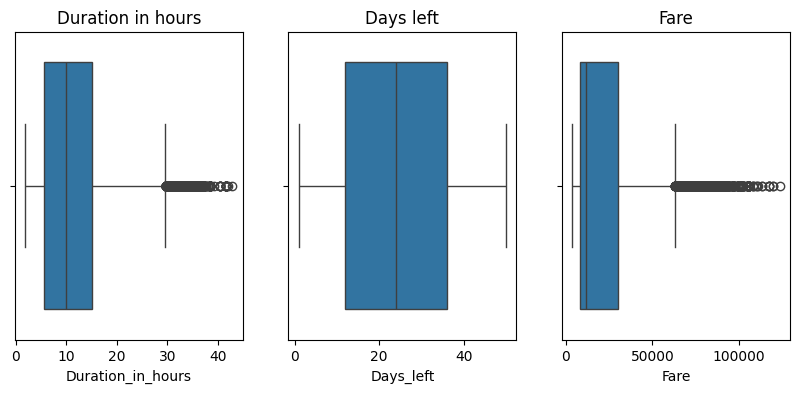

In [5]:
# Box and Whisker plot of summary statistics
fig, axs = plt.subplots(ncols=3, figsize=(10,4))

sns.boxplot(data=df, x='Duration_in_hours', ax=axs[0])
axs[0].set_title('Duration in hours')

sns.boxplot(data=df, x='Days_left', ax=axs[1])
axs[1].set_title('Days left')

sns.boxplot(data=df, x='Fare', ax=axs[2])
axs[2].set_title('Fare')

plt.show()

#### For Duration_in_hours, the range is [0.75,43.6],mean duration is 12.35, median is 11.33, standard deviation is 7.43
#### For Days_left, the range is [1,50],mean is 25.62, median is 26,standard deviation is 14.3
#### For Fare, the range is [1307,143019],mean is 22840.1, median is 13407,standard deviation is 20308

### Flights Distribution Over Time

In [6]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
grouped_data = df.groupby('Date_of_journey')['Fare'].count().reset_index()

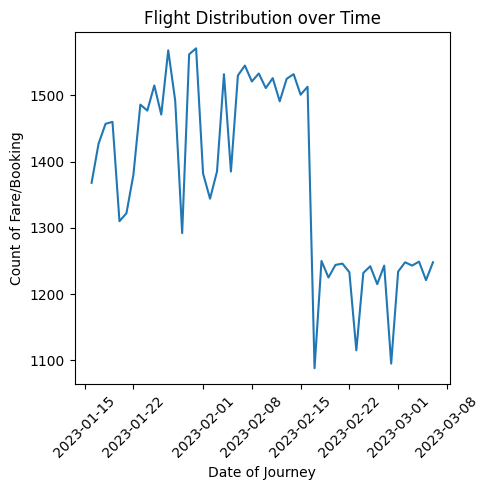

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(grouped_data['Date_of_journey'], grouped_data['Fare'])
plt.xlabel('Date of Journey')
plt.ylabel('Count of Fare/Booking')
plt.title('Flight Distribution over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Based on the line chart, the duration of the dataset is between Jan 15 2023 and Mar 6 2023.
#### The highest flight number occurs at the end of Jan 2023, which is more than 9750 per day.

  Journey_day   Fare
0      Monday  11206
1     Tuesday   9893
2   Wednesday   9843
3    Thursday   9684
4      Friday   9337
5    Saturday   9613
6      Sunday   9209


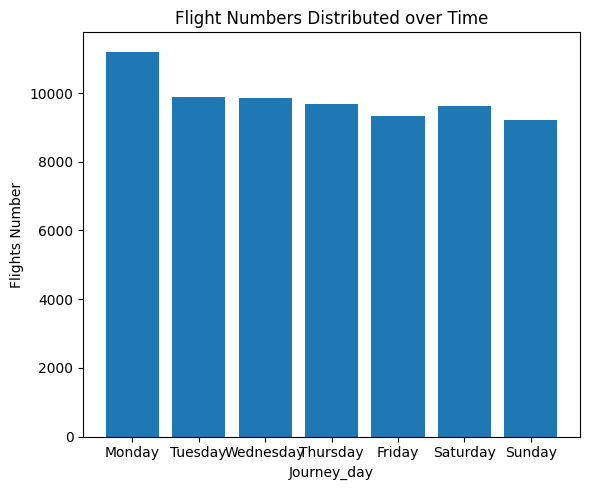

In [8]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=cats, ordered=True)

grouped_data = df.groupby('Journey_day').agg({'Fare': 'count'}).reset_index()

print(grouped_data)

plt.figure(figsize=(6, 5))
plt.bar(grouped_data['Journey_day'], grouped_data['Fare'])
plt.xlabel('Journey_day')
plt.ylabel('Flights Number')
plt.title('Flight Numbers Distributed over Time')
plt.tight_layout()
plt.show()

#### Based on the bar chart, Monday is the day with highest flight frequencies

### Flights Distribution Over Location

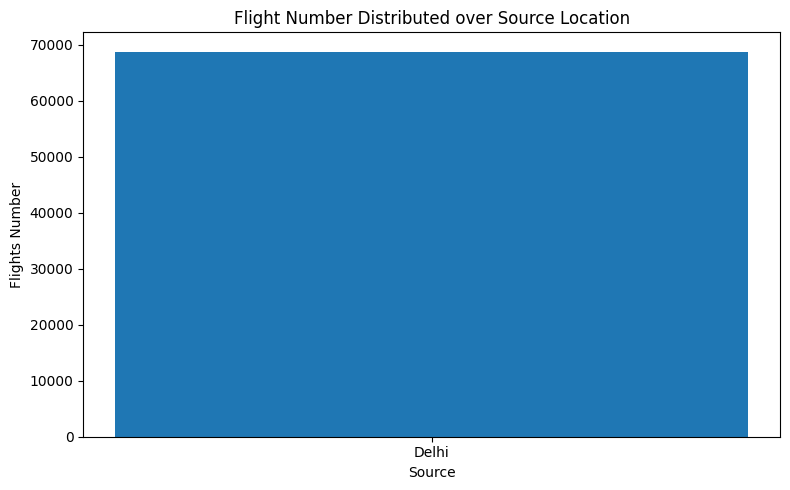

In [9]:
grouped_data = df.groupby('Source').agg({'Fare': 'count'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(grouped_data['Source'], grouped_data['Fare'])
plt.xlabel('Source')
plt.ylabel('Flights Number')
plt.title('Flight Number Distributed over Source Location')
plt.tight_layout()
plt.show()

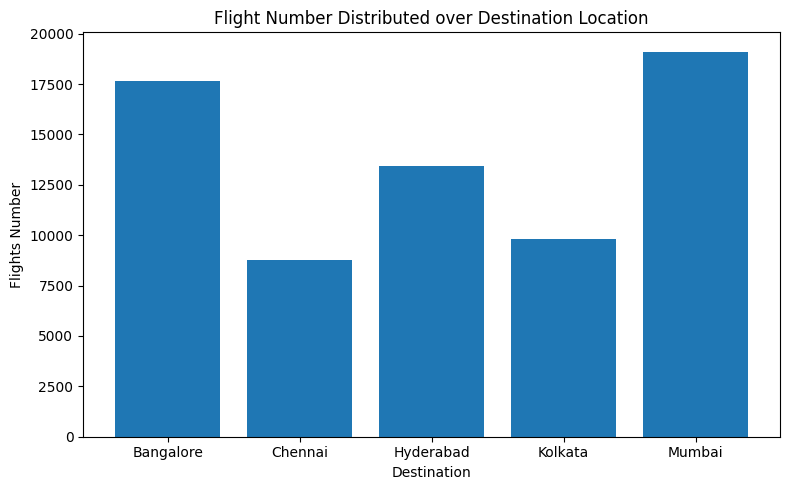

In [10]:
grouped_data = df.groupby('Destination').agg({'Fare': 'count'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(grouped_data['Destination'], grouped_data['Fare'])
plt.xlabel('Destination')
plt.ylabel('Flights Number')
plt.title('Flight Number Distributed over Destination Location')
plt.tight_layout()
plt.show()

#### Based on the bar chart, Delhi, Mumbai and Bangalore are the top 3 common departure and arrival locations, which indicates they are the most busiest airports in India.

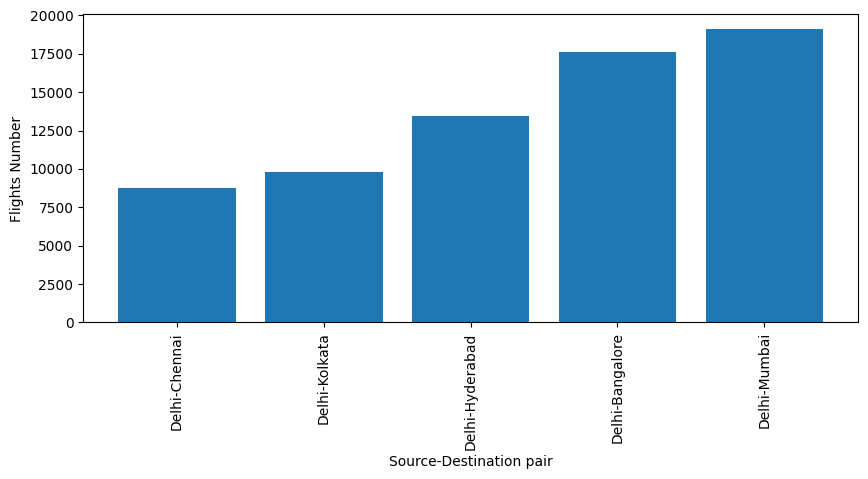

In [11]:
flight_count = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')
flight_count = flight_count.sort_values(by='Count')
fig = plt.figure(figsize=(10, 4))

plt.bar(flight_count['Source'] + '-' + flight_count['Destination'], flight_count['Count'])
plt.xticks(rotation=90)
plt.xlabel('Source-Destination pair')
plt.ylabel('Flights Number')
plt.show()

#### Based on the bar chart, Delhi-Mumbai has the most flights numbers, indicating it is the most popular pair of travel destination.

### Price Variation

#### Journey day by Delhi-Mumbai

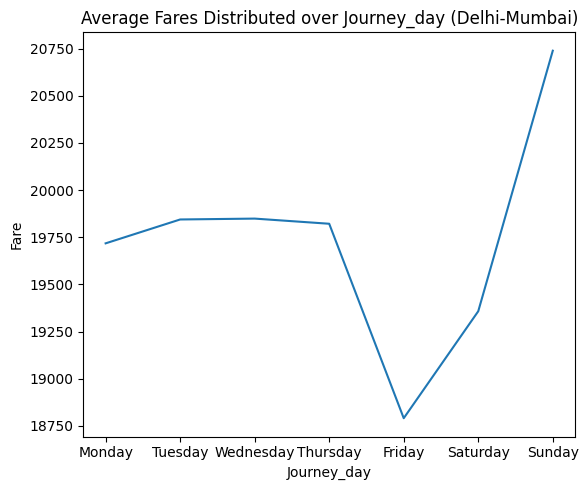

  Journey_day          Fare
0      Monday  19717.624718
1     Tuesday  19844.192280
2   Wednesday  19848.829367
3    Thursday  19821.507900
4      Friday  18790.357259
5    Saturday  19357.617445
6      Sunday  20739.132717


In [12]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

most_popular_od = od_counts.loc[od_counts['Count'].idxmax()]

filtered_df = df[(df['Source'] == most_popular_od['Source']) & (df['Destination'] == most_popular_od['Destination'])]

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=cats, ordered=True)

fare_distribution = filtered_df.groupby('Journey_day').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(fare_distribution['Journey_day'], fare_distribution['Fare'])
plt.xlabel('Journey_day')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Journey_day (Delhi-Mumbai)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)


#### Journey day by Delhi-Bangalore

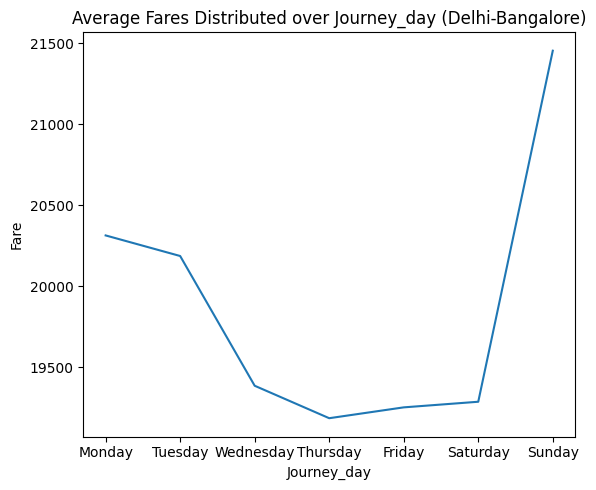

  Journey_day          Fare
0      Monday  20314.627184
1     Tuesday  20187.667714
2   Wednesday  19387.375203
3    Thursday  19187.156188
4      Friday  19254.048380
5    Saturday  19288.677898
6      Sunday  21454.026441


In [13]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')
sorted_od_counts = od_counts.sort_values('Count', ascending=False)
second_most_popular_od = sorted_od_counts.iloc[1]

filtered_df = df[(df['Source'] == second_most_popular_od['Source']) & (df['Destination'] == second_most_popular_od['Destination'])]

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=cats, ordered=True)

fare_distribution = filtered_df.groupby('Journey_day').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(fare_distribution['Journey_day'], fare_distribution['Fare'])
plt.xlabel('Journey_day')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Journey_day (Delhi-Bangalore)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)

#### Journey day by Bangalore-Delhi

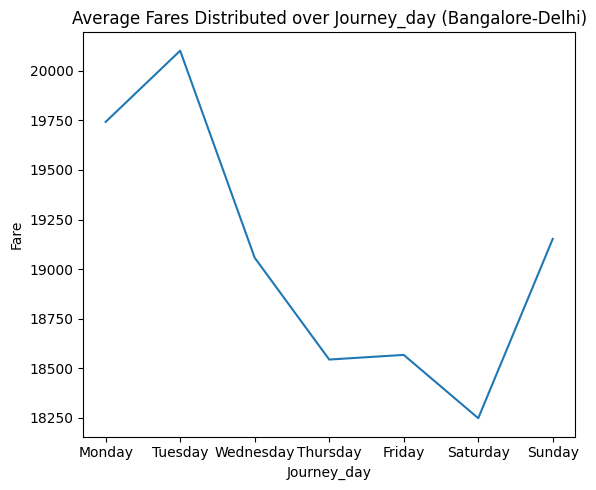

  Journey_day          Fare
0      Monday  19742.385503
1     Tuesday  20101.458309
2   Wednesday  19057.659906
3    Thursday  18544.291272
4      Friday  18567.730084
5    Saturday  18248.547967
6      Sunday  19152.831746


In [14]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')
sorted_od_counts = od_counts.sort_values('Count', ascending=False)
third_most_popular_od = sorted_od_counts.iloc[2]

filtered_df = df[(df['Source'] == third_most_popular_od['Source']) & (df['Destination'] == third_most_popular_od['Destination'])]

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=cats, ordered=True)

fare_distribution = filtered_df.groupby('Journey_day').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(fare_distribution['Journey_day'], fare_distribution['Fare'])
plt.xlabel('Journey_day')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Journey_day (Bangalore-Delhi)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)

#### Based on the line chart, Wednesday has the highest average fare during a week.

#### By Class

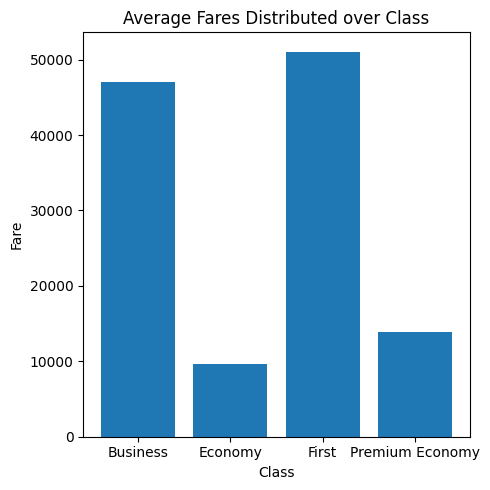

In [15]:
grouped_data = df.groupby('Class').agg({'Fare': 'mean'}).reset_index()
plt.figure(figsize=(5, 5))
plt.bar(grouped_data['Class'], grouped_data['Fare'])
plt.xlabel('Class')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Class')
plt.tight_layout()
plt.show()

#### The bar chart shows the average fare of first class is 6 times the fare of economy class.

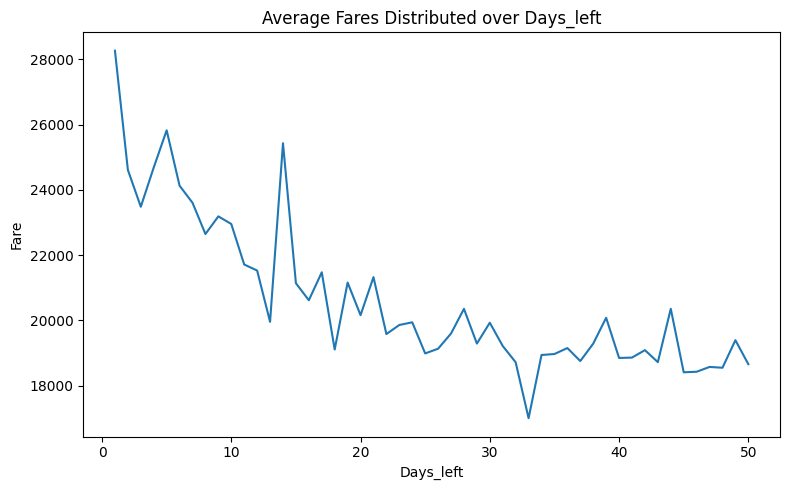

In [16]:
grouped_data = df.groupby('Days_left').agg({'Fare': 'mean'}).reset_index()
plt.figure(figsize=(8, 5))
plt.plot(grouped_data['Days_left'], grouped_data['Fare'])
plt.xlabel('Days_left')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Days_left')
plt.tight_layout()
plt.show()

#### Days_left by Delhi-Mumbai

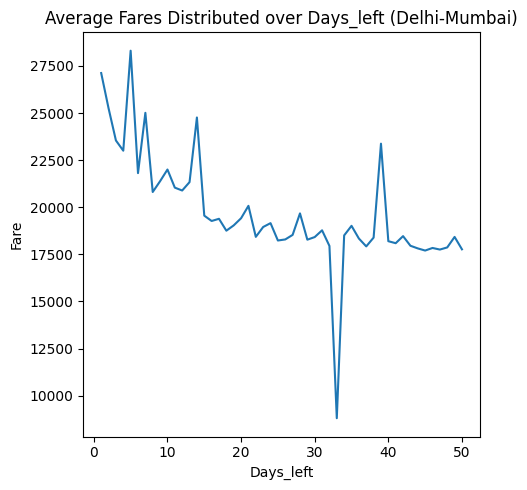

In [17]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

most_popular_od = od_counts.loc[od_counts['Count'].idxmax()]

filtered_df = df[(df['Source'] == most_popular_od['Source']) & (df['Destination'] == most_popular_od['Destination'])]

fare_distribution = filtered_df.groupby('Days_left').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(5, 5))
plt.plot(fare_distribution['Days_left'], fare_distribution['Fare'])
plt.xlabel('Days_left')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Days_left (Delhi-Mumbai)')
plt.tight_layout()
plt.show()


#### The line chart shows the the decreasing trend as the days left increasing, which indicates the fact that the earlier the customer book the ticket, the cheaper the fare in general, with some fluctuation.
The reason for the large decrease in day 33 is the lack of business and first class orders on that day, which is a Friday.

Thw reason for the increase in day 5,14 and 39 is the decrease in the economy orders while the business and first class order remain the same.

#### Duration_in_hours by Delhi-Mumbai for non-stop flight

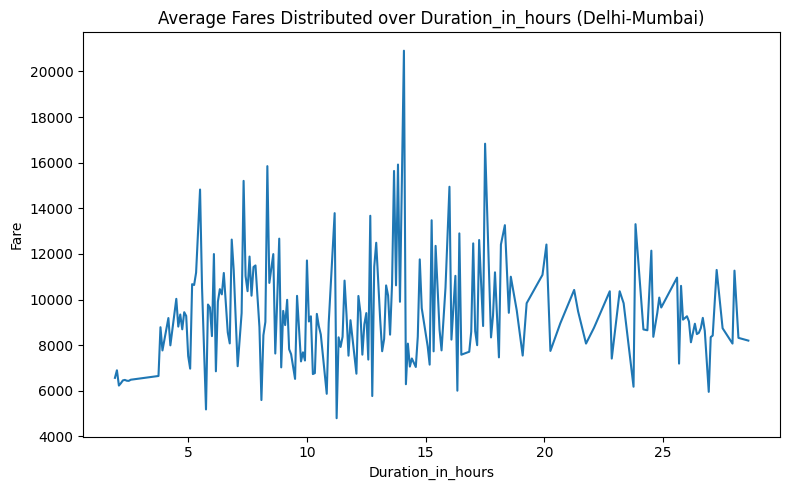

     Duration_in_hours          Fare
0               1.9167   6569.464789
1               2.0000   6902.187500
2               2.0833   6231.903509
3               2.1667   6334.648649
4               2.2500   6457.839306
..                 ...           ...
194            27.5000   8744.200000
195            27.9167   8072.000000
196            28.0000  11268.000000
197            28.1667   8323.000000
198            28.5833   8202.000000

[199 rows x 2 columns]


In [18]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

most_popular_od = od_counts.loc[od_counts['Count'].idxmax()]

filtered_df = df[(df['Source'] == most_popular_od['Source']) & (df['Destination'] == most_popular_od['Destination']) & (df['Class'] == 'Economy')]

fare_distribution = filtered_df.groupby('Duration_in_hours').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(8, 5))
plt.plot(fare_distribution['Duration_in_hours'], fare_distribution['Fare'])
plt.xlabel('Duration_in_hours')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Duration_in_hours (Delhi-Mumbai)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)

#### Duration_in_hours by Delhi-Mumbai for one-stop flight

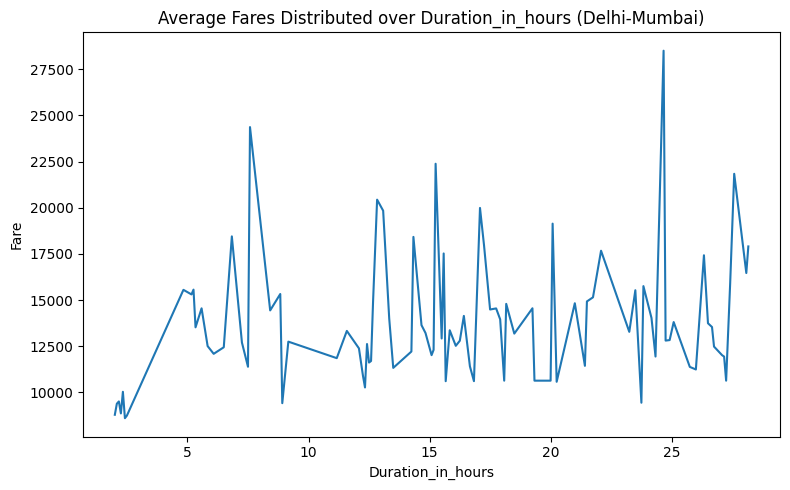

    Duration_in_hours          Fare
0              2.0000   8791.120000
1              2.0833   9391.292929
2              2.1667   9513.155779
3              2.2500   8865.136691
4              2.3333  10036.000000
..                ...           ...
89            27.2500  10638.000000
90            27.4167  15902.857143
91            27.5833  21838.000000
92            28.0833  16465.555556
93            28.1667  17905.375000

[94 rows x 2 columns]


In [19]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

most_popular_od = od_counts.loc[od_counts['Count'].idxmax()]

filtered_df = df[(df['Source'] == most_popular_od['Source']) & (df['Destination'] == most_popular_od['Destination']) & (df['Class'] == 'Premium Economy')]

fare_distribution = filtered_df.groupby('Duration_in_hours').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(8, 5))
plt.plot(fare_distribution['Duration_in_hours'], fare_distribution['Fare'])
plt.xlabel('Duration_in_hours')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Duration_in_hours (Delhi-Mumbai)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)

#### Duration_in_hours by Delhi-Mumbai for 2 more stops flight

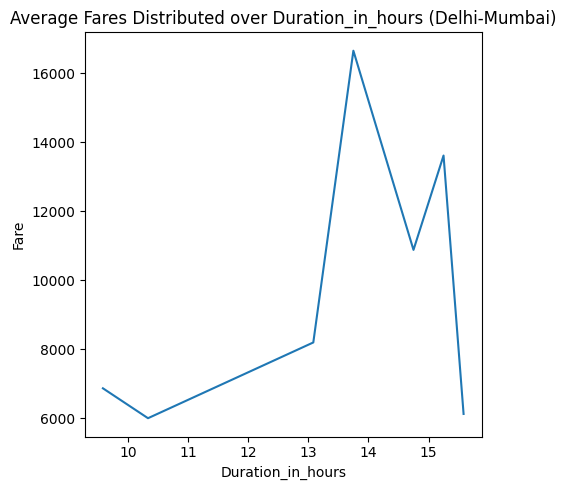

   Duration_in_hours          Fare
0             9.5833   6873.000000
1            10.3333   6007.000000
2            13.0833   8201.000000
3            13.7500  16650.857143
4            14.7500  10882.000000
5            15.2500  13614.952381
6            15.5833   6130.714286


In [20]:
od_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

most_popular_od = od_counts.loc[od_counts['Count'].idxmax()]

filtered_df = df[(df['Source'] == most_popular_od['Source']) & (df['Destination'] == most_popular_od['Destination']) & (df['Total_stops'] == '2+-stop')]

fare_distribution = filtered_df.groupby('Duration_in_hours').agg({'Fare': 'mean'}).reset_index()

plt.figure(figsize=(5, 5))
plt.plot(fare_distribution['Duration_in_hours'], fare_distribution['Fare'])
plt.xlabel('Duration_in_hours')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Duration_in_hours (Delhi-Mumbai)')
plt.tight_layout()
plt.show()

# Printing the average fare distribution
print(fare_distribution)

#### Based on the trend between the duration_in_hours and average fare flitered by total stops in one OD pair, there is no clear relationship between the duration and fare.

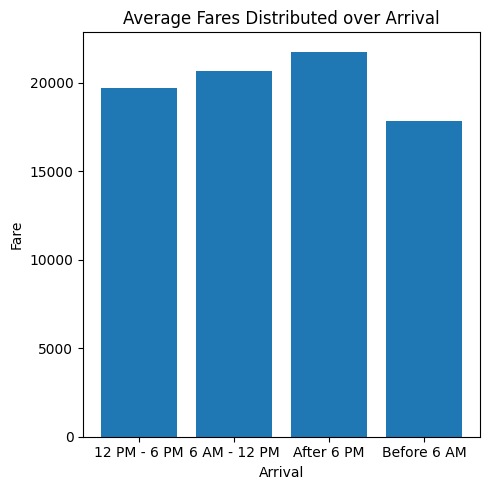

In [21]:
grouped_data = df.groupby('Arrival').agg({'Fare': 'mean'}).reset_index()
plt.figure(figsize=(5, 5))
plt.bar(grouped_data['Arrival'], grouped_data['Fare'])
plt.xlabel('Arrival')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Arrival')
plt.tight_layout()
plt.show()

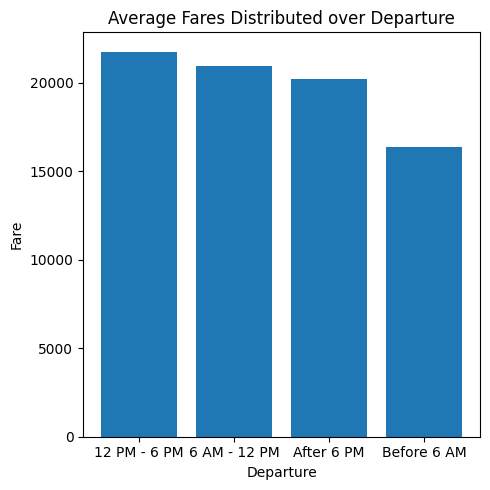

In [22]:
grouped_data = df.groupby('Departure').agg({'Fare': 'mean'}).reset_index()
plt.figure(figsize=(5, 5))
plt.bar(grouped_data['Departure'], grouped_data['Fare'])
plt.xlabel('Departure')
plt.ylabel('Fare')
plt.title('Average Fares Distributed over Departure')
plt.tight_layout()
plt.show()

#### Based on the bar charts, the arrival and departure time after 6pm has the highest average fare, and before 6 am has the lowest average fare

In [23]:
import plotly.express as px
df = pd.read_csv('/content/Cleaned_dataset.csv')
fig = px.box(df, y = "Fare", x = 'Airline', color_discrete_sequence = ["green"], template = 'seaborn')
fig.show()

#### Vistara and Air India Airlines have maximum price compared to others

<ipython-input-24-f46daf9107f8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




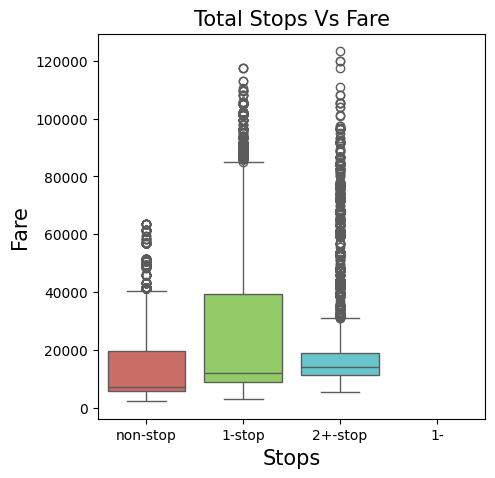

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Total_stops',y='Fare',data=df,palette='hls')
plt.title('Total Stops Vs Fare',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

## Model Development ##

### Data Preprocessing

In [25]:
features_to_drop = ['Date_of_journey', "Flight_code"]
df = df.drop(features_to_drop, axis=1)
df.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0
1,Monday,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0
2,Monday,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0
3,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0
4,Monday,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0


#### Label encoding

In [26]:
mapping = {'non-stop': 0, '1-stop': 1, '2+-stop': 2}
df['Total_stops'] = df['Total_stops'].map(mapping)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mapping = {'non-stop': 0, '1-stop': 1, '2+-stop': 2}

for col in df.columns:
    if df[col].dtype == 'object':
        if col=='Total_stops':
            df['Total_stops'] = df['Total_stops'].map(mapping)
        else:
            encoded_values = le.fit_transform(df[col])
            df[col]=le.fit_transform(df[col])
            class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
            print(f"Column '{col}': {class_mapping}")

Column 'Journey_day': {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Column 'Airline': {'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'Vistara': 7}
Column 'Class': {'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}
Column 'Source': {'Delhi': 0, 'Mumbai': 1}
Column 'Departure': {'12 PM - 6 PM': 0, '6 AM - 12 PM': 1, 'After 6 PM': 2, 'Before 6 AM': 3}
Column 'Arrival': {'12 PM - 6 PM': 0, '6 AM - 12 PM': 1, 'After 6 PM': 2, 'Before 6 AM': 3, nan: 4}
Column 'Destination': {'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6, nan: 7}


In [28]:
data=df
data

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,1,6,1,0,2,0.0,2,6,2.0833,1.0,5335.0
1,1,5,1,0,2,0.0,3,6,2.3333,1.0,5899.0
2,1,4,1,0,2,0.0,3,6,2.1667,1.0,5801.0
3,1,6,1,0,2,0.0,2,6,2.0833,1.0,5794.0
4,1,0,1,0,2,0.0,2,6,2.1667,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
88335,3,0,0,1,0,1.0,0,3,5.1667,14.0,35520.0
88336,3,0,0,1,0,1.0,0,3,26.0833,14.0,37244.0
88337,3,7,0,1,1,1.0,0,3,10.5833,14.0,37181.0
88338,3,7,0,1,2,1.0,0,3,18.5000,14.0,37181.0


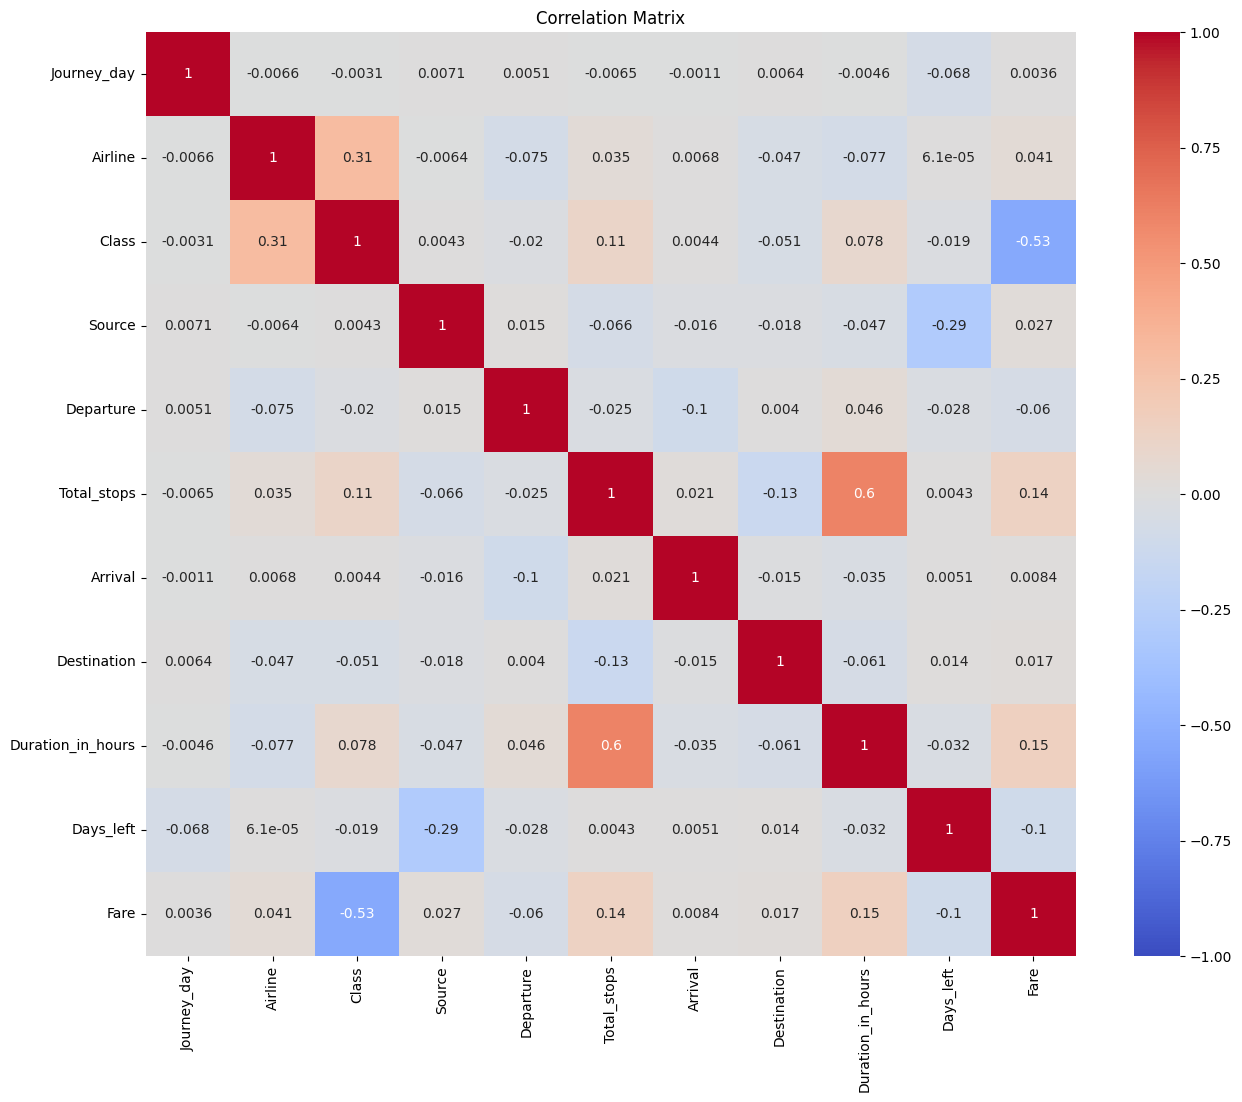

In [29]:
corr_mat = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


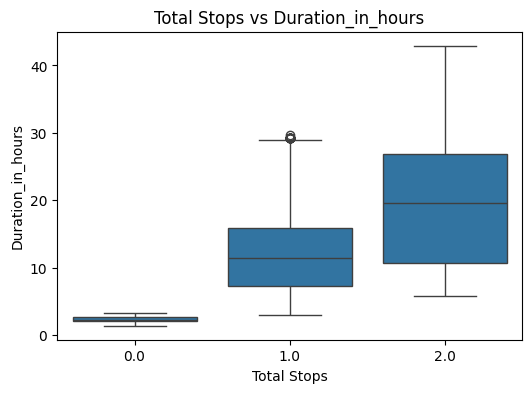

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(6, 4))
sns.boxplot(x='Total_stops', y='Duration_in_hours', data=df)

plt.xlabel('Total Stops')
plt.ylabel('Duration_in_hours')
plt.title('Total Stops vs Duration_in_hours')

plt.show()

#### Standard scaling

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler(with_mean=False)

y = data["Fare"]
X = data.drop("Fare", axis = 1)
# Drop samples with missing values
X = X.dropna()
y = y.loc[X.index]  # Ensure the target variable matches the filtered feature variables

# Check the shapes to ensure the operation was successful
print(X.shape)
print(y.shape)
X_stan= ss.fit_transform(X)
X_stan=pd.DataFrame(X_stan,columns=X.columns)
X_stan.head()

(88339, 10)
(88339,)


,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left
0,0.499331,1.978508,1.06707,0.0,2.125404,0.0,2.253449,2.850407,0.280654,0.068436
1,0.499331,1.648757,1.06707,0.0,2.125404,0.0,3.380174,2.850407,0.314333,0.068436
2,0.499331,1.319005,1.06707,0.0,2.125404,0.0,3.380174,2.850407,0.291889,0.068436
3,0.499331,1.978508,1.06707,0.0,2.125404,0.0,2.253449,2.850407,0.280654,0.068436
4,0.499331,0.000000,1.06707,0.0,2.125404,0.0,2.253449,2.850407,0.291889,0.068436


In [32]:
import pandas as pd

correlation = X_stan['Total_stops'].corr(X_stan['Duration_in_hours'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.6016801826119438


In [33]:
y.index=np.arange(0,len(y))
y

0         5335.0
1         5899.0
2         5801.0
3         5794.0
4         5955.0
          ...   
88334    35520.0
88335    35520.0
88336    37244.0
88337    37181.0
88338    37181.0
Name: Fare, Length: 88339, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_stan, y, test_size=0.3, random_state=42)


### Feature Selection

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [36]:
feature_importances = rf.feature_importances_
feature_importances

array([0.00844212, 0.01841381, 0.78404897, 0.00272946, 0.00969858,
       0.00708441, 0.00827211, 0.02622485, 0.09321552, 0.04187018])

In [37]:
selected_features = np.ones(X_train.shape[1], dtype=bool)
selected_features_indices = np.where(selected_features)[0]

while True:
    # Train the model with selected features
    rf.fit(X_train.iloc[:, selected_features_indices], y_train)
    prev_score = rf.score(X_train.iloc[:, selected_features_indices], y_train)

    # Get the importances for the selected features
    selected_importances = rf.feature_importances_[selected_features]

    # Find the feature with the lowest importance score
    feature_to_remove = np.argmin(selected_importances)

    # Remove the feature from the selected features
    selected_features[feature_to_remove] = False

    # Check if any features are left
    if not np.any(selected_features):
        break

    # Retrain the model without the removed feature
    rf.fit(X_train.iloc[:, selected_features_indices], y_train)
    new_score = rf.score(X_train.iloc[:, selected_features_indices], y_train)

    # Check if removing more features improves performance
    if new_score <= prev_score:
        break

final_selected_features = selected_features
final_selected_features_indices = np.where(final_selected_features)[0]

# Use selected features for final model training
X_selected = X_train.iloc[:, final_selected_features_indices]

In [38]:
features_to_drop = ['Total_stops']
X_stan = X_stan.drop(features_to_drop, axis=1)
X_stan.head()

,Journey_day,Airline,Class,Source,Departure,Arrival,Destination,Duration_in_hours,Days_left
0,0.499331,1.978508,1.06707,0.0,2.125404,2.253449,2.850407,0.280654,0.068436
1,0.499331,1.648757,1.06707,0.0,2.125404,3.380174,2.850407,0.314333,0.068436
2,0.499331,1.319005,1.06707,0.0,2.125404,3.380174,2.850407,0.291889,0.068436
3,0.499331,1.978508,1.06707,0.0,2.125404,2.253449,2.850407,0.280654,0.068436
4,0.499331,0.000000,1.06707,0.0,2.125404,2.253449,2.850407,0.291889,0.068436


#### The feature Total Stops have been removed. The feature importance is the lowest and doesn't improve model performance. The reason is the Total Stops and duration in hours are correlated. The non-stop implies shorter duration in hours, 2+stops implies longer duration, therefore, total stops can be removed.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_stan, y, test_size=0.3, random_state=42)

#### Model Selection

In [40]:
# Define your models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100, min_samples_split=10, max_depth=None, random_state=42)),
    ('Decision Tree Regression', DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_leaf=2, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, max_depth=5, random_state=42)),
    ('XGBoost Regression', xgboost.XGBRegressor(learning_rate=0.1, n_estimators=50, max_depth=5, random_state=42)),
    ('Bagging Regression', BaggingRegressor()),
    ('Extra Tree Regression', ExtraTreesRegressor())
]

# Initialize lists to store results
model_names = []
test_mse = []
test_rmse = []
test_mae = []
r_squared = []

# Function to calculate MAE
def cal_mae(model, X, y, k):
    return -np.mean(cross_val_score(model, X, y, cv=k, scoring='neg_mean_absolute_error'))

for model_name, model in models:
    # Calculate RMSE and R-squared
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to lists
    model_names.append(model_name)
    test_mse.append(mse)
    test_rmse.append(rmse)
    test_mae.append(mae)
    r_squared.append(r2)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Test RMSE': test_rmse,
    'Test MAE': test_mae,
    'R-squared': r_squared
})

# Print the results table
print(results_df)


                          Model     Test RMSE      Test MAE  R-squared
0             Linear Regression  14173.929412  11838.795868   0.400336
1      Random Forest Regression   4111.362484   2025.237617   0.949546
2      Decision Tree Regression   6294.754948   3691.286062   0.881727
3  Gradient Boosting Regression   5237.539014   3029.084275   0.918119
4            XGBoost Regression   5262.470971   3045.754457   0.917338
5            Bagging Regression   4369.927291   2094.949412   0.943000
6         Extra Tree Regression   4581.289477   2164.413086   0.937353


#### By comparing RMSE, MAE, and R-squared, Random Forest Regression turns out to be the best model for the airfare dataset. It has the lowest MAE and RMSE, and the R-squared value is cloest to 1.

### Prediction by using Random Forest Regression

In [41]:
random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=10, max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [42]:
output = pd.DataFrame({'actual_price':y_test,'predicted_price':y_pred})
output.head()

,actual_price,predicted_price
33813,32859.0,36695.264024
24847,8129.0,8392.327362
73671,12004.0,12035.138140
36040,77786.0,53842.248063
59745,47545.0,47545.000000


#### Result Interpretation

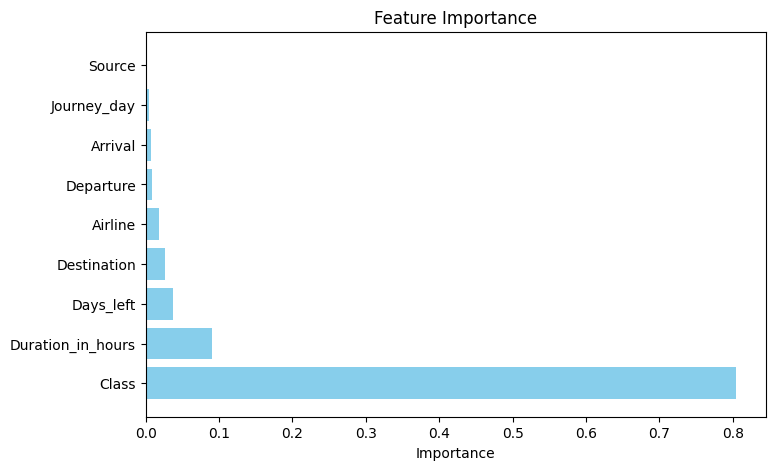

In [43]:
importances = random_forest.feature_importances_
fn=['Journey_day','Airline','Class','Source','Departure','Arrival','Destination','Duration_in_hours','Days_left']
feature_importances = pd.DataFrame({'Feature': fn, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [44]:
random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=10, max_depth=3, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=10, random_state=42)

[Text(0.5, 0.875, 'Class <= 0.534\nsquared_error = 331623822.739\nsamples = 39135\nvalue = 20624.821'),
 Text(0.25, 0.625, 'Duration_in_hours <= 0.539\nsquared_error = 207987598.799\nsamples = 10995\nvalue = 46277.217'),
 Text(0.125, 0.375, 'Airline <= 1.154\nsquared_error = 67399887.748\nsamples = 1726\nvalue = 29310.879'),
 Text(0.0625, 0.125, 'squared_error = 24786638.767\nsamples = 842\nvalue = 26627.606'),
 Text(0.1875, 0.125, 'squared_error = 94818783.413\nsamples = 884\nvalue = 31893.986'),
 Text(0.375, 0.375, 'Airline <= 1.154\nsquared_error = 170302790.096\nsamples = 9269\nvalue = 49455.209'),
 Text(0.3125, 0.125, 'squared_error = 50826066.88\nsamples = 3951\nvalue = 44600.276'),
 Text(0.4375, 0.125, 'squared_error = 228220934.312\nsamples = 5318\nvalue = 53036.299'),
 Text(0.75, 0.625, 'Class <= 1.601\nsquared_error = 23768038.617\nsamples = 28140\nvalue = 10636.37'),
 Text(0.625, 0.375, 'Duration_in_hours <= 0.443\nsquared_error = 14869172.996\nsamples = 22306\nvalue = 9668.

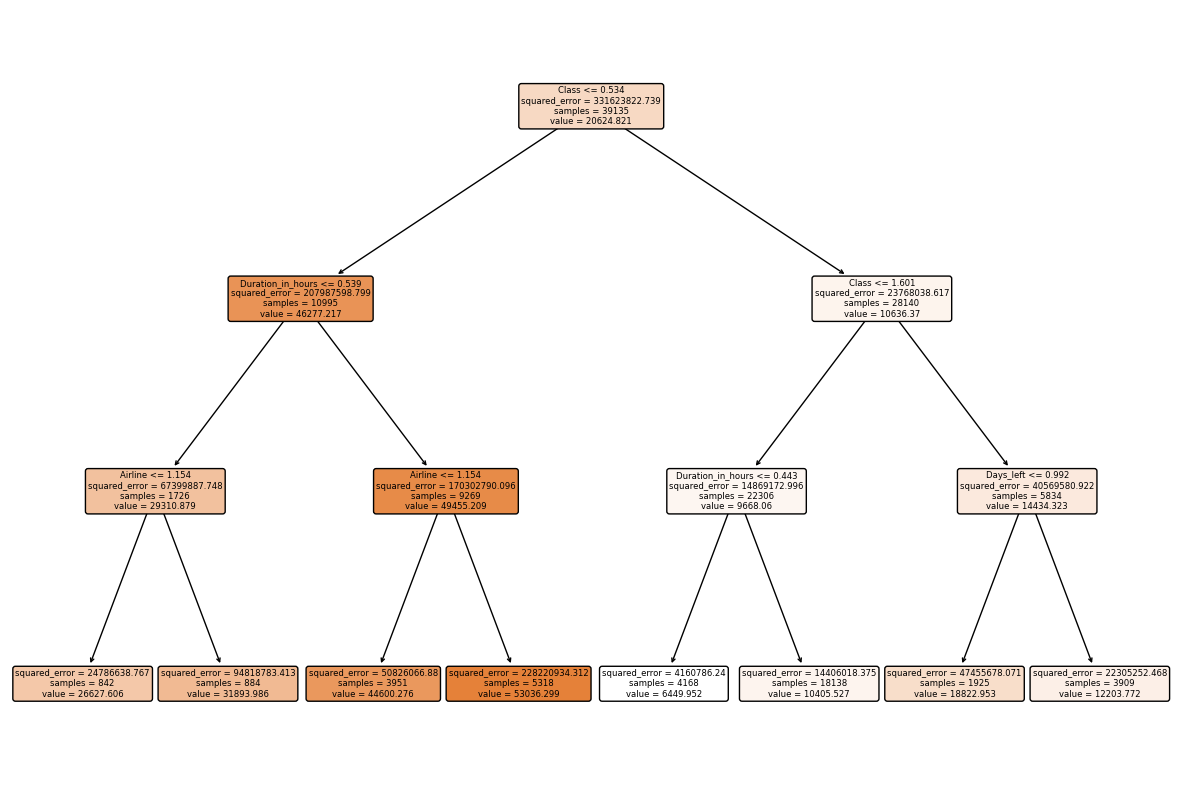

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=list(X_stan.columns)
cn=['Fare']
fig = plt.figure(figsize=(15, 10))
plot_tree(random_forest.estimators_[0],
          feature_names=fn,
          class_names=cn,
          filled=True, impurity=True,
          rounded=True)

In [46]:
fig.savefig('random forest.png')

In [47]:
unique_values = X_stan['Class'].unique()
print(unique_values)

[1.06707013 3.2012104  0.         2.13414027]


In [48]:
# Rescale the column to its original values
mean = ss.mean_
std = ss.scale_
X_original = X_stan.copy()
X_original['Duration_in_hours'] = X_stan['Duration_in_hours'] *std[8]
X_original['Duration_in_hours']

0         2.0833
1         2.3333
2         2.1667
3         2.0833
4         2.1667
          ...   
88334    19.8333
88335     5.1667
88336    26.0833
88337    10.5833
88338    18.5000
Name: Duration_in_hours, Length: 88339, dtype: float64

Class': {'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3} ; 0.6*7.4314

#### The lowest price is Economy class with the Duration in hours is less than 4.46h

#### Based on the box plot, flights with 1 stop has maximum ticket fare